In [75]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

<h1> The procedure can be order as follows : </h1> <br>
1. Import libraries & dataset <br>
2. Eda or visualization <br>
3. Feature Engineering <br>
4. Modelling <br>
5. Submitting

 # Import libraries 

In [76]:
import pandas as pd

train = pd.read_csv('C:/Users/abcd/Desktop/TItanic/train.csv')
test = pd.read_csv('C:/Users/abcd/Desktop/TItanic/test.csv')

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Define libraries

In [79]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set() # setting seaborn default for plots

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

#         Visualization or EDA <br>
I have to assume the outcome from the visualization.

In [80]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

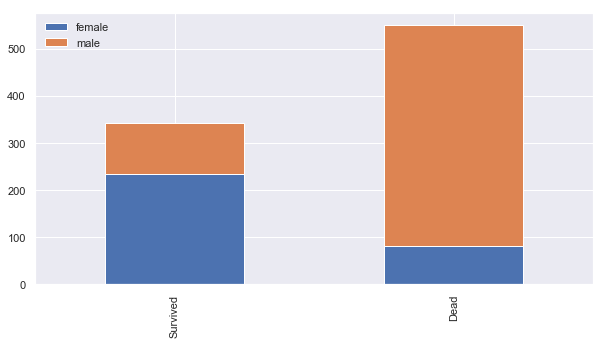

In [81]:
bar_chart('Sex')

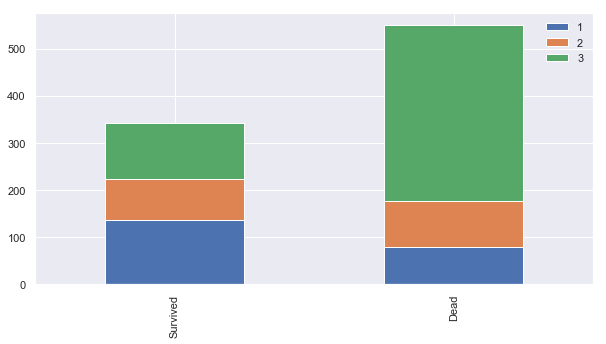

In [82]:
bar_chart('Pclass')

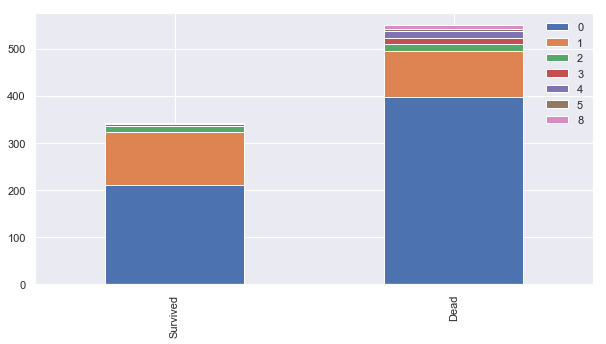

In [83]:
bar_chart('SibSp')

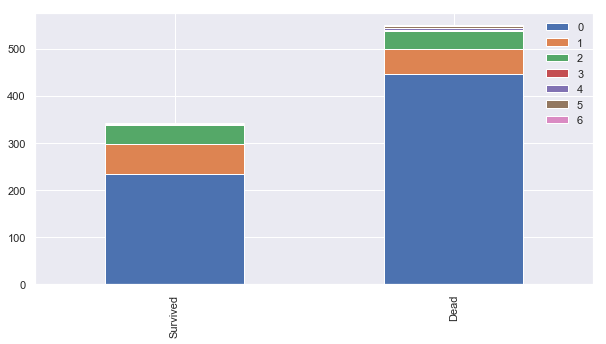

In [84]:
bar_chart('Parch')

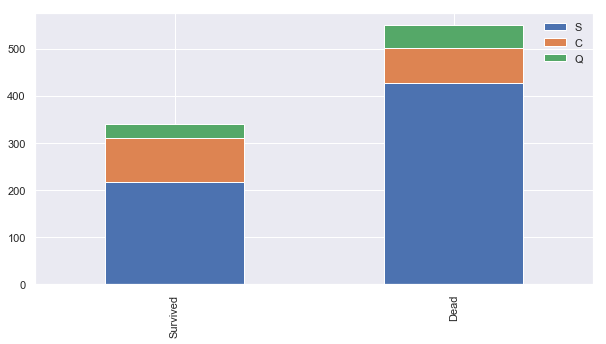

In [85]:
bar_chart('Embarked')

In [86]:
train_a = train #use a demo variable, in case it is destroyed somehow
train_a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

In [87]:
train_test_data = [train_a, test] # combining train and test dataset

for dataset in train_test_data: #here train_test_data set is a list and it will change all of the table's info
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [88]:
train_a['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Countess      1
Don           1
Mme           1
Sir           1
Jonkheer      1
Lady          1
Ms            1
Name: Title, dtype: int64

In [89]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [90]:
train_a.Title.head()

0    0
1    2
2    1
3    2
4    0
Name: Title, dtype: int64

In [91]:
train_a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [92]:
train_a.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


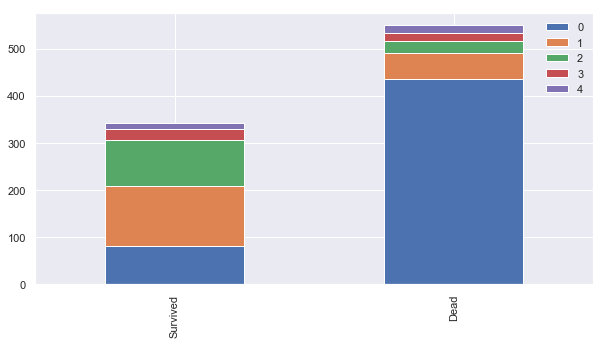

In [93]:
bar_chart('Title')

In [104]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


<h3> Change both train and test data frame simultaneously, as we must finally combine them </h3>

In [95]:
# delete unnecessary feature from dataset
train_a.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [105]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


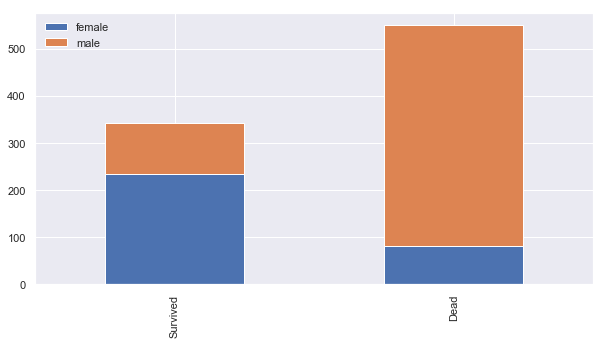

In [97]:
bar_chart('Sex')

In [106]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [107]:
train_a['Title'].value_counts()

0    517
1    182
2    125
3     40
4     27
Name: Title, dtype: int64

In [108]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [109]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

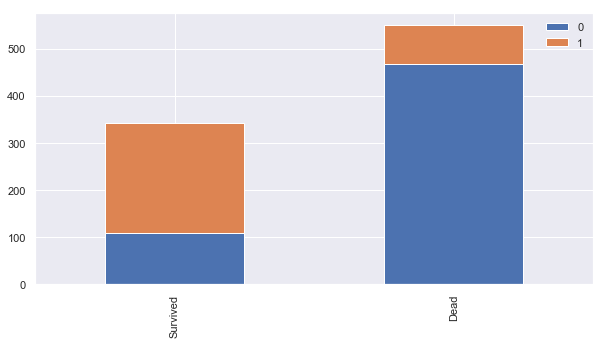

In [110]:
bar_chart('Sex')

In [112]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [113]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train_a["Age"].fillna(train_a.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [114]:
train_a.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


In [115]:
train_a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

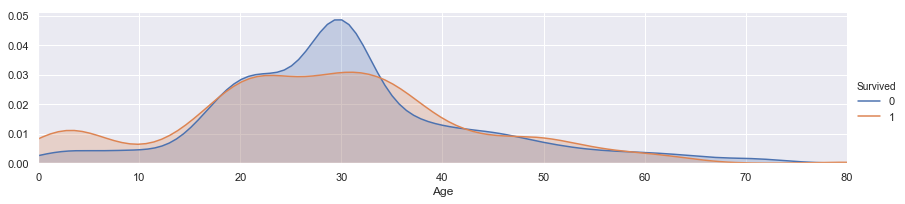

In [116]:
# just to see the situation
facet = sns.FacetGrid(train_a, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

# Binning

In [117]:

for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

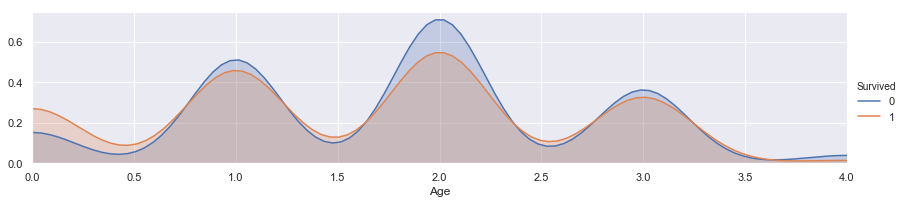

In [118]:
facet = sns.FacetGrid(train_a, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_a['Age'].max()))
facet.add_legend()
 
plt.show()

In [119]:
train_a.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


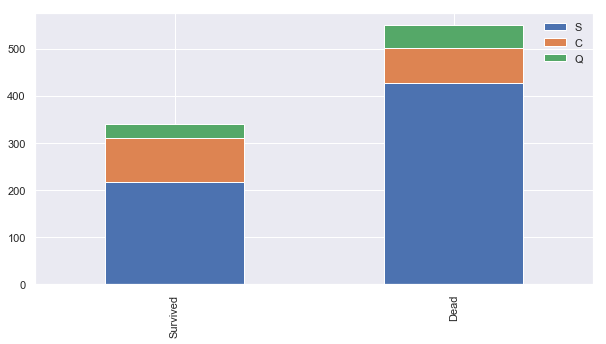

In [120]:
bar_chart('Embarked')

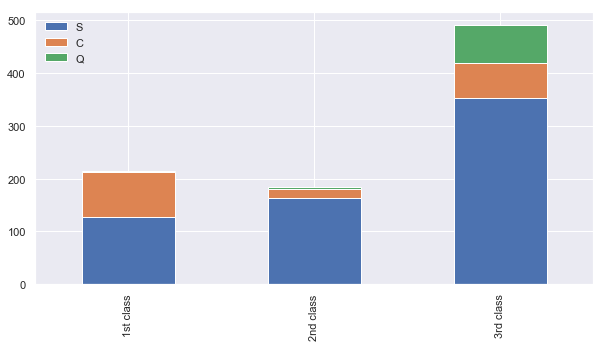

In [121]:
Pclass1 = train_a[train_a['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_a[train_a['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_a[train_a['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [122]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [123]:
train_a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [124]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [125]:
train_a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [126]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

<h4> Fare </h4>

In [127]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [128]:

# fill missing Fare with median fare for each Pclass
train_a["Fare"].fillna(train_a.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


In [129]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [130]:
train_a.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [131]:
train_a.Fare.value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

In [132]:
train_a.size

10692

In [133]:
train_a.Fare.size

891

In [134]:
train_a.Sex.size

891

In [135]:
train_a.Cabin.size

891

In [136]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [137]:
train_a.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,E,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2


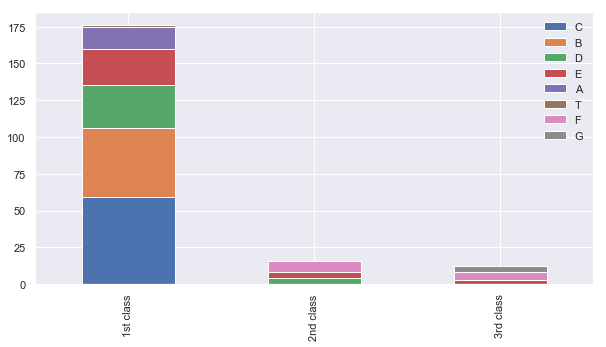

In [139]:
#train_a has taken as a demo here, ultimately I have to assign the values for both train and test data frame
Pclass1 = train_a[train_a['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_a[train_a['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_a[train_a['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [140]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [141]:
# fill missing Fare with median fare for each Pclass
train_a["Cabin"].fillna(train_a.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)

In [142]:
train_a["FamilySize"] = train_a["SibSp"] + train_a["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [143]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [144]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_a = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train_a = train_a.drop(['PassengerId'], axis=1)

In [145]:
train_data = train_a.drop('Survived', axis=1)
target = train_a['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [146]:
train_a.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.033333,0,0,0.4
1,1,1,1,3.0,2.0,0.800000,1,2,0.4
2,1,3,1,1.0,0.0,2.033333,0,1,0.0
3,1,1,1,2.0,2.0,0.800000,0,2,0.4
4,0,3,0,2.0,0.0,2.033333,0,0,0.0


# Modelling

In [147]:
# Split the dataframe into data and labels
X_train = train_a.drop('Survived', axis=1) # data
y_train = train_a.Survived # labels

In [148]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [151]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.033333,0,0,0.4
1,1,1,3.0,2.0,0.800000,1,2,0.4
2,3,1,1.0,0.0,2.033333,0,1,0.0
3,1,1,2.0,2.0,0.800000,0,2,0.4
4,3,0,2.0,0.0,2.033333,0,0,0.0


In [152]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [153]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 81.82
Accuracy CV 10-Fold: 81.37
Running Time: 0:00:03.152970


In [154]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 85.86
Accuracy CV 10-Fold: 82.15
Running Time: 0:00:00.080785


In [155]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 77.89
Accuracy CV 10-Fold: 77.89
Running Time: 0:00:00.043928


In [156]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 81.37
Accuracy CV 10-Fold: 81.26
Running Time: 0:00:00.476904


In [157]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 72.5
Accuracy CV 10-Fold: 77.33
Running Time: 0:00:00.044883


In [158]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 90.24
Accuracy CV 10-Fold: 79.8
Running Time: 0:00:00.058841


In [159]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.98
Accuracy CV 10-Fold: 82.94
Running Time: 0:00:00.306161


## CatBoost

In [161]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 5, 6], dtype=int64)

In [162]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [163]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.016216
0:	learn: 0.6841727	total: 84.2ms	remaining: 1m 24s
1:	learn: 0.6734972	total: 114ms	remaining: 57.1s
2:	learn: 0.6648074	total: 142ms	remaining: 47s
3:	learn: 0.6553494	total: 151ms	remaining: 37.6s
4:	learn: 0.6465647	total: 158ms	remaining: 31.4s
5:	learn: 0.6386154	total: 165ms	remaining: 27.3s
6:	learn: 0.6306159	total: 171ms	remaining: 24.3s
7:	learn: 0.6230687	total: 177ms	remaining: 22s
8:	learn: 0.6160654	total: 188ms	remaining: 20.7s
9:	learn: 0.6094516	total: 197ms	remaining: 19.5s
10:	learn: 0.6028097	total: 203ms	remaining: 18.3s
11:	learn: 0.5962892	total: 214ms	remaining: 17.6s
12:	learn: 0.5901705	total: 222ms	remaining: 16.8s
13:	learn: 0.5837059	total: 227ms	remaining: 16s
14:	learn: 0.5784923	total: 232ms	remaining: 15.2s
15:	learn: 0.5719031	total: 240ms	remaining: 14.8s
16:	learn: 0.5668275	total: 245ms	remaining: 14.2s
17:	learn: 0.5620827	total: 253ms	remaining: 13.8s
18:	learn: 0.5572944	total: 263ms	remaining: 13.6s
19:	learn: 0.55

151:	learn: 0.3786482	total: 1.14s	remaining: 6.38s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

152:	learn: 0.3784802	total: 1.16s	remaining: 6.45s
153:	learn: 0.3780010	total: 1.2s	remaining: 6.58s
154:	learn: 0.3774883	total: 1.21s	remaining: 6.59s
155:	learn: 0.3772027	total: 1.21s	remaining: 6.56s
156:	learn: 0.3767258	total: 1.22s	remaining: 6.55s
157:	learn: 0.3765617	total: 1.23s	remaining: 6.53s
158:	learn: 0.3761550	total: 1.23s	remaining: 6.52s
159:	learn: 0.3760132	total: 1.24s	remaining: 6.51s
160:	learn: 0.3754195	total: 1.25s	remaining: 6.51s
161:	learn: 0.3748711	total: 1.27s	remaining: 6.56s
162:	learn: 0.3746542	total: 1.27s	remaining: 6.55s
163:	learn: 0.3742830	total: 1.28s	remaining: 6.54s
164:	learn: 0.3741467	total: 1.29s	remaining: 6.54s
165:	learn: 0.3738688	total: 1.3s	remaining: 6.52s
166:	learn: 0.3736106	total: 1.3s	remaining: 6.5s
167:	learn: 0.3729882	total: 1.31s	remaining: 6.49s
168:	learn: 0.3726542	total: 1.31s	remaining: 6.45s
169:	learn: 0.3722471	total: 1.32s	remaining: 6.43s
170:	learn: 0.3721933	total: 1.32s	remaining: 6.39s
171:	learn: 0.37

314:	learn: 0.3425073	total: 2.13s	remaining: 4.64s
315:	learn: 0.3423201	total: 2.15s	remaining: 4.66s
316:	learn: 0.3421053	total: 2.16s	remaining: 4.64s
317:	learn: 0.3418994	total: 2.16s	remaining: 4.63s
318:	learn: 0.3417854	total: 2.16s	remaining: 4.61s
319:	learn: 0.3417733	total: 2.17s	remaining: 4.6s
320:	learn: 0.3416645	total: 2.17s	remaining: 4.59s
321:	learn: 0.3415014	total: 2.18s	remaining: 4.59s
322:	learn: 0.3415014	total: 2.18s	remaining: 4.57s
323:	learn: 0.3413273	total: 2.18s	remaining: 4.55s
324:	learn: 0.3411126	total: 2.19s	remaining: 4.55s
325:	learn: 0.3410250	total: 2.2s	remaining: 4.55s
326:	learn: 0.3409569	total: 2.2s	remaining: 4.54s
327:	learn: 0.3407516	total: 2.21s	remaining: 4.53s
328:	learn: 0.3407516	total: 2.21s	remaining: 4.51s
329:	learn: 0.3407009	total: 2.22s	remaining: 4.5s
330:	learn: 0.3406582	total: 2.22s	remaining: 4.5s
331:	learn: 0.3403808	total: 2.23s	remaining: 4.49s
332:	learn: 0.3402597	total: 2.24s	remaining: 4.49s
333:	learn: 0.340

474:	learn: 0.3178111	total: 3.21s	remaining: 3.55s
475:	learn: 0.3176423	total: 3.22s	remaining: 3.54s
476:	learn: 0.3175677	total: 3.23s	remaining: 3.54s
477:	learn: 0.3175210	total: 3.23s	remaining: 3.53s
478:	learn: 0.3174492	total: 3.24s	remaining: 3.52s
479:	learn: 0.3173927	total: 3.25s	remaining: 3.52s
480:	learn: 0.3170776	total: 3.25s	remaining: 3.51s
481:	learn: 0.3169729	total: 3.26s	remaining: 3.5s
482:	learn: 0.3168310	total: 3.27s	remaining: 3.5s
483:	learn: 0.3167220	total: 3.27s	remaining: 3.49s
484:	learn: 0.3165972	total: 3.27s	remaining: 3.48s
485:	learn: 0.3165202	total: 3.28s	remaining: 3.47s
486:	learn: 0.3164031	total: 3.3s	remaining: 3.47s
487:	learn: 0.3163877	total: 3.3s	remaining: 3.46s
488:	learn: 0.3162597	total: 3.31s	remaining: 3.46s
489:	learn: 0.3159022	total: 3.31s	remaining: 3.45s
490:	learn: 0.3156109	total: 3.32s	remaining: 3.44s
491:	learn: 0.3155412	total: 3.32s	remaining: 3.43s
492:	learn: 0.3154568	total: 3.32s	remaining: 3.42s
493:	learn: 0.31

652:	learn: 0.2942454	total: 4.76s	remaining: 2.53s
653:	learn: 0.2941992	total: 4.76s	remaining: 2.52s
654:	learn: 0.2940414	total: 4.77s	remaining: 2.51s
655:	learn: 0.2939764	total: 4.78s	remaining: 2.5s
656:	learn: 0.2938880	total: 4.78s	remaining: 2.5s
657:	learn: 0.2937483	total: 4.79s	remaining: 2.49s
658:	learn: 0.2935725	total: 4.79s	remaining: 2.48s
659:	learn: 0.2934312	total: 4.79s	remaining: 2.47s
660:	learn: 0.2933872	total: 4.8s	remaining: 2.46s
661:	learn: 0.2933374	total: 4.8s	remaining: 2.45s
662:	learn: 0.2931832	total: 4.8s	remaining: 2.44s
663:	learn: 0.2929850	total: 4.81s	remaining: 2.43s
664:	learn: 0.2928720	total: 4.82s	remaining: 2.43s
665:	learn: 0.2928061	total: 4.82s	remaining: 2.42s
666:	learn: 0.2925967	total: 4.83s	remaining: 2.41s
667:	learn: 0.2925247	total: 4.84s	remaining: 2.4s
668:	learn: 0.2924561	total: 4.84s	remaining: 2.39s
669:	learn: 0.2924171	total: 4.84s	remaining: 2.38s
670:	learn: 0.2923387	total: 4.84s	remaining: 2.38s
671:	learn: 0.2921

833:	learn: 0.2736984	total: 6.19s	remaining: 1.23s
834:	learn: 0.2736096	total: 6.2s	remaining: 1.22s
835:	learn: 0.2735800	total: 6.2s	remaining: 1.22s
836:	learn: 0.2734713	total: 6.22s	remaining: 1.21s
837:	learn: 0.2733690	total: 6.23s	remaining: 1.21s
838:	learn: 0.2732523	total: 6.24s	remaining: 1.2s
839:	learn: 0.2732246	total: 6.24s	remaining: 1.19s
840:	learn: 0.2730778	total: 6.25s	remaining: 1.18s
841:	learn: 0.2730427	total: 6.25s	remaining: 1.17s
842:	learn: 0.2730276	total: 6.26s	remaining: 1.17s
843:	learn: 0.2729374	total: 6.27s	remaining: 1.16s
844:	learn: 0.2728493	total: 6.28s	remaining: 1.15s
845:	learn: 0.2726721	total: 6.28s	remaining: 1.14s
846:	learn: 0.2725325	total: 6.29s	remaining: 1.14s
847:	learn: 0.2725108	total: 6.29s	remaining: 1.13s
848:	learn: 0.2723203	total: 6.29s	remaining: 1.12s
849:	learn: 0.2721616	total: 6.31s	remaining: 1.11s
850:	learn: 0.2719181	total: 6.31s	remaining: 1.1s
851:	learn: 0.2717800	total: 6.32s	remaining: 1.1s
852:	learn: 0.271

999:	learn: 0.2573581	total: 7.25s	remaining: 0us


In [164]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6758089	test: 0.6768544	best: 0.6768544 (0)	total: 301ms	remaining: 5m 1s
1:	learn: 0.6595389	test: 0.6607073	best: 0.6607073 (1)	total: 570ms	remaining: 4m 44s
2:	learn: 0.6481604	test: 0.6494082	best: 0.6494082 (2)	total: 810ms	remaining: 4m 29s
3:	learn: 0.6327486	test: 0.6348207	best: 0.6348207 (3)	total: 1.06s	remaining: 4m 24s
4:	learn: 0.6170117	test: 0.6203744	best: 0.6203744 (4)	total: 1.35s	remaining: 4m 29s
5:	learn: 0.6040992	test: 0.6080570	best: 0.6080570 (5)	total: 1.6s	remaining: 4m 25s
6:	learn: 0.5933211	test: 0.5976322	best: 0.5976322 (6)	total: 1.83s	remaining: 4m 19s
7:	learn: 0.5813018	test: 0.5863437	best: 0.5863437 (7)	total: 2.07s	remaining: 4m 16s
8:	learn: 0.5705394	test: 0.5760682	best: 0.5760682 (8)	total: 2.29s	remaining: 4m 11s
9:	learn: 0.5598879	test: 0.5658151	best: 0.5658151 (9)	total: 2.54s	remaining: 4m 10s
10:	learn: 0.5508447	test: 0.5573666	best: 0.5573666 (10)	total: 2.81s	remaining: 4m 12s
11:	learn: 0.5414752	test: 0.5487533	best: 

93:	learn: 0.3689993	test: 0.4116610	best: 0.4116610 (93)	total: 22.2s	remaining: 3m 33s
94:	learn: 0.3686146	test: 0.4115422	best: 0.4115422 (94)	total: 22.4s	remaining: 3m 33s
95:	learn: 0.3681670	test: 0.4114755	best: 0.4114755 (95)	total: 22.6s	remaining: 3m 32s
96:	learn: 0.3677316	test: 0.4114852	best: 0.4114755 (95)	total: 22.8s	remaining: 3m 32s
97:	learn: 0.3672426	test: 0.4113530	best: 0.4113530 (97)	total: 23.1s	remaining: 3m 32s
98:	learn: 0.3667771	test: 0.4111430	best: 0.4111430 (98)	total: 23.3s	remaining: 3m 31s
99:	learn: 0.3662152	test: 0.4106277	best: 0.4106277 (99)	total: 23.5s	remaining: 3m 31s
100:	learn: 0.3658725	test: 0.4108899	best: 0.4106277 (99)	total: 23.7s	remaining: 3m 31s
101:	learn: 0.3651290	test: 0.4108146	best: 0.4106277 (99)	total: 24s	remaining: 3m 31s
102:	learn: 0.3646442	test: 0.4106761	best: 0.4106277 (99)	total: 24.2s	remaining: 3m 30s
103:	learn: 0.3642763	test: 0.4103708	best: 0.4103708 (103)	total: 24.4s	remaining: 3m 30s
104:	learn: 0.3638

184:	learn: 0.3372704	test: 0.4095102	best: 0.4087928 (158)	total: 42.4s	remaining: 3m 6s
185:	learn: 0.3368772	test: 0.4095698	best: 0.4087928 (158)	total: 42.7s	remaining: 3m 6s
186:	learn: 0.3365844	test: 0.4097256	best: 0.4087928 (158)	total: 42.9s	remaining: 3m 6s
187:	learn: 0.3363387	test: 0.4095311	best: 0.4087928 (158)	total: 43.1s	remaining: 3m 6s
188:	learn: 0.3361083	test: 0.4095030	best: 0.4087928 (158)	total: 43.6s	remaining: 3m 6s
189:	learn: 0.3358462	test: 0.4093000	best: 0.4087928 (158)	total: 44.1s	remaining: 3m 7s
190:	learn: 0.3356040	test: 0.4094092	best: 0.4087928 (158)	total: 44.6s	remaining: 3m 8s
191:	learn: 0.3353348	test: 0.4093387	best: 0.4087928 (158)	total: 45.1s	remaining: 3m 9s
192:	learn: 0.3350165	test: 0.4094655	best: 0.4087928 (158)	total: 45.5s	remaining: 3m 10s
193:	learn: 0.3347034	test: 0.4094995	best: 0.4087928 (158)	total: 46.1s	remaining: 3m 11s
194:	learn: 0.3344576	test: 0.4095890	best: 0.4087928 (158)	total: 46.6s	remaining: 3m 12s
195:	le

274:	learn: 0.3140479	test: 0.4113485	best: 0.4087928 (158)	total: 1m 27s	remaining: 3m 49s
275:	learn: 0.3138418	test: 0.4114818	best: 0.4087928 (158)	total: 1m 27s	remaining: 3m 50s
276:	learn: 0.3135552	test: 0.4115796	best: 0.4087928 (158)	total: 1m 28s	remaining: 3m 50s
277:	learn: 0.3132980	test: 0.4117323	best: 0.4087928 (158)	total: 1m 28s	remaining: 3m 50s
278:	learn: 0.3130862	test: 0.4117484	best: 0.4087928 (158)	total: 1m 29s	remaining: 3m 50s
279:	learn: 0.3128105	test: 0.4117976	best: 0.4087928 (158)	total: 1m 29s	remaining: 3m 50s
280:	learn: 0.3125679	test: 0.4118421	best: 0.4087928 (158)	total: 1m 30s	remaining: 3m 51s
281:	learn: 0.3122718	test: 0.4118621	best: 0.4087928 (158)	total: 1m 30s	remaining: 3m 51s
282:	learn: 0.3120491	test: 0.4117611	best: 0.4087928 (158)	total: 1m 31s	remaining: 3m 51s
283:	learn: 0.3117871	test: 0.4116493	best: 0.4087928 (158)	total: 1m 31s	remaining: 3m 51s
284:	learn: 0.3115699	test: 0.4116272	best: 0.4087928 (158)	total: 1m 32s	remain

364:	learn: 0.2932361	test: 0.4146079	best: 0.4087928 (158)	total: 2m 7s	remaining: 3m 42s
365:	learn: 0.2930899	test: 0.4146023	best: 0.4087928 (158)	total: 2m 8s	remaining: 3m 42s
366:	learn: 0.2927924	test: 0.4145931	best: 0.4087928 (158)	total: 2m 8s	remaining: 3m 42s
367:	learn: 0.2925565	test: 0.4147145	best: 0.4087928 (158)	total: 2m 9s	remaining: 3m 42s
368:	learn: 0.2922986	test: 0.4147513	best: 0.4087928 (158)	total: 2m 9s	remaining: 3m 41s
369:	learn: 0.2920450	test: 0.4148526	best: 0.4087928 (158)	total: 2m 10s	remaining: 3m 41s
370:	learn: 0.2918407	test: 0.4148558	best: 0.4087928 (158)	total: 2m 10s	remaining: 3m 41s
371:	learn: 0.2916145	test: 0.4148395	best: 0.4087928 (158)	total: 2m 11s	remaining: 3m 41s
372:	learn: 0.2913919	test: 0.4149801	best: 0.4087928 (158)	total: 2m 11s	remaining: 3m 41s
373:	learn: 0.2911795	test: 0.4150421	best: 0.4087928 (158)	total: 2m 12s	remaining: 3m 41s
374:	learn: 0.2909434	test: 0.4151687	best: 0.4087928 (158)	total: 2m 12s	remaining: 

454:	learn: 0.2747398	test: 0.4178073	best: 0.4087928 (158)	total: 2m 55s	remaining: 3m 29s
455:	learn: 0.2745769	test: 0.4177477	best: 0.4087928 (158)	total: 2m 55s	remaining: 3m 29s
456:	learn: 0.2743762	test: 0.4178120	best: 0.4087928 (158)	total: 2m 56s	remaining: 3m 29s
457:	learn: 0.2742530	test: 0.4179238	best: 0.4087928 (158)	total: 2m 56s	remaining: 3m 28s
458:	learn: 0.2740414	test: 0.4179535	best: 0.4087928 (158)	total: 2m 56s	remaining: 3m 28s
459:	learn: 0.2738336	test: 0.4180160	best: 0.4087928 (158)	total: 2m 57s	remaining: 3m 27s
460:	learn: 0.2736085	test: 0.4179860	best: 0.4087928 (158)	total: 2m 57s	remaining: 3m 27s
461:	learn: 0.2734566	test: 0.4180067	best: 0.4087928 (158)	total: 2m 57s	remaining: 3m 26s
462:	learn: 0.2732250	test: 0.4178572	best: 0.4087928 (158)	total: 2m 57s	remaining: 3m 26s
463:	learn: 0.2729839	test: 0.4178114	best: 0.4087928 (158)	total: 2m 57s	remaining: 3m 25s
464:	learn: 0.2728174	test: 0.4179767	best: 0.4087928 (158)	total: 2m 58s	remain

544:	learn: 0.2594712	test: 0.4224399	best: 0.4087928 (158)	total: 3m 38s	remaining: 3m 2s
545:	learn: 0.2593001	test: 0.4224081	best: 0.4087928 (158)	total: 3m 39s	remaining: 3m 2s
546:	learn: 0.2591494	test: 0.4224801	best: 0.4087928 (158)	total: 3m 39s	remaining: 3m 1s
547:	learn: 0.2590358	test: 0.4225004	best: 0.4087928 (158)	total: 3m 40s	remaining: 3m 1s
548:	learn: 0.2588428	test: 0.4225194	best: 0.4087928 (158)	total: 3m 40s	remaining: 3m 1s
549:	learn: 0.2586507	test: 0.4226056	best: 0.4087928 (158)	total: 3m 41s	remaining: 3m 1s
550:	learn: 0.2584767	test: 0.4227921	best: 0.4087928 (158)	total: 3m 41s	remaining: 3m
551:	learn: 0.2583515	test: 0.4228225	best: 0.4087928 (158)	total: 3m 42s	remaining: 3m
552:	learn: 0.2582586	test: 0.4228447	best: 0.4087928 (158)	total: 3m 42s	remaining: 3m
553:	learn: 0.2581297	test: 0.4228533	best: 0.4087928 (158)	total: 3m 43s	remaining: 2m 59s
554:	learn: 0.2579735	test: 0.4230075	best: 0.4087928 (158)	total: 3m 44s	remaining: 2m 59s
555:	l

634:	learn: 0.2460848	test: 0.4273420	best: 0.4087928 (158)	total: 4m 27s	remaining: 2m 33s
635:	learn: 0.2459382	test: 0.4273956	best: 0.4087928 (158)	total: 4m 27s	remaining: 2m 33s
636:	learn: 0.2457950	test: 0.4271956	best: 0.4087928 (158)	total: 4m 28s	remaining: 2m 32s
637:	learn: 0.2456012	test: 0.4273671	best: 0.4087928 (158)	total: 4m 28s	remaining: 2m 32s
638:	learn: 0.2454745	test: 0.4272515	best: 0.4087928 (158)	total: 4m 29s	remaining: 2m 32s
639:	learn: 0.2453655	test: 0.4272199	best: 0.4087928 (158)	total: 4m 29s	remaining: 2m 31s
640:	learn: 0.2451703	test: 0.4271432	best: 0.4087928 (158)	total: 4m 30s	remaining: 2m 31s
641:	learn: 0.2449881	test: 0.4274912	best: 0.4087928 (158)	total: 4m 30s	remaining: 2m 31s
642:	learn: 0.2448756	test: 0.4275159	best: 0.4087928 (158)	total: 4m 31s	remaining: 2m 30s
643:	learn: 0.2447734	test: 0.4275571	best: 0.4087928 (158)	total: 4m 31s	remaining: 2m 30s
644:	learn: 0.2446286	test: 0.4276709	best: 0.4087928 (158)	total: 4m 32s	remain

724:	learn: 0.2339703	test: 0.4330327	best: 0.4087928 (158)	total: 5m 15s	remaining: 1m 59s
725:	learn: 0.2338465	test: 0.4331483	best: 0.4087928 (158)	total: 5m 15s	remaining: 1m 59s
726:	learn: 0.2337259	test: 0.4332020	best: 0.4087928 (158)	total: 5m 16s	remaining: 1m 58s
727:	learn: 0.2335616	test: 0.4333558	best: 0.4087928 (158)	total: 5m 16s	remaining: 1m 58s
728:	learn: 0.2334589	test: 0.4334151	best: 0.4087928 (158)	total: 5m 17s	remaining: 1m 57s
729:	learn: 0.2333605	test: 0.4335063	best: 0.4087928 (158)	total: 5m 17s	remaining: 1m 57s
730:	learn: 0.2332145	test: 0.4335201	best: 0.4087928 (158)	total: 5m 18s	remaining: 1m 57s
731:	learn: 0.2330209	test: 0.4335501	best: 0.4087928 (158)	total: 5m 18s	remaining: 1m 56s
732:	learn: 0.2328753	test: 0.4336138	best: 0.4087928 (158)	total: 5m 19s	remaining: 1m 56s
733:	learn: 0.2327492	test: 0.4336686	best: 0.4087928 (158)	total: 5m 20s	remaining: 1m 56s
734:	learn: 0.2326309	test: 0.4337348	best: 0.4087928 (158)	total: 5m 20s	remain

814:	learn: 0.2227496	test: 0.4390390	best: 0.4087928 (158)	total: 6m 5s	remaining: 1m 22s
815:	learn: 0.2226532	test: 0.4391404	best: 0.4087928 (158)	total: 6m 6s	remaining: 1m 22s
816:	learn: 0.2225028	test: 0.4391988	best: 0.4087928 (158)	total: 6m 7s	remaining: 1m 22s
817:	learn: 0.2223870	test: 0.4392428	best: 0.4087928 (158)	total: 6m 7s	remaining: 1m 21s
818:	learn: 0.2222041	test: 0.4394121	best: 0.4087928 (158)	total: 6m 8s	remaining: 1m 21s
819:	learn: 0.2220758	test: 0.4395693	best: 0.4087928 (158)	total: 6m 9s	remaining: 1m 21s
820:	learn: 0.2219277	test: 0.4394911	best: 0.4087928 (158)	total: 6m 9s	remaining: 1m 20s
821:	learn: 0.2218180	test: 0.4396045	best: 0.4087928 (158)	total: 6m 10s	remaining: 1m 20s
822:	learn: 0.2216837	test: 0.4396932	best: 0.4087928 (158)	total: 6m 10s	remaining: 1m 19s
823:	learn: 0.2214824	test: 0.4397436	best: 0.4087928 (158)	total: 6m 11s	remaining: 1m 19s
824:	learn: 0.2213070	test: 0.4397448	best: 0.4087928 (158)	total: 6m 11s	remaining: 1m

904:	learn: 0.2122796	test: 0.4453195	best: 0.4087928 (158)	total: 6m 56s	remaining: 43.7s
905:	learn: 0.2121833	test: 0.4453933	best: 0.4087928 (158)	total: 6m 56s	remaining: 43.2s
906:	learn: 0.2121245	test: 0.4454260	best: 0.4087928 (158)	total: 6m 56s	remaining: 42.7s
907:	learn: 0.2120681	test: 0.4455091	best: 0.4087928 (158)	total: 6m 57s	remaining: 42.3s
908:	learn: 0.2119905	test: 0.4455637	best: 0.4087928 (158)	total: 6m 57s	remaining: 41.8s
909:	learn: 0.2119074	test: 0.4455432	best: 0.4087928 (158)	total: 6m 57s	remaining: 41.3s
910:	learn: 0.2118269	test: 0.4456810	best: 0.4087928 (158)	total: 6m 57s	remaining: 40.8s
911:	learn: 0.2117051	test: 0.4458072	best: 0.4087928 (158)	total: 6m 58s	remaining: 40.3s
912:	learn: 0.2115478	test: 0.4459102	best: 0.4087928 (158)	total: 6m 58s	remaining: 39.9s
913:	learn: 0.2114432	test: 0.4459708	best: 0.4087928 (158)	total: 6m 58s	remaining: 39.4s
914:	learn: 0.2113057	test: 0.4460503	best: 0.4087928 (158)	total: 6m 59s	remaining: 38.9s

995:	learn: 0.2031920	test: 0.4508492	best: 0.4087928 (158)	total: 7m 43s	remaining: 1.86s
996:	learn: 0.2031035	test: 0.4508633	best: 0.4087928 (158)	total: 7m 43s	remaining: 1.4s
997:	learn: 0.2030313	test: 0.4508677	best: 0.4087928 (158)	total: 7m 44s	remaining: 930ms
998:	learn: 0.2029589	test: 0.4509091	best: 0.4087928 (158)	total: 7m 44s	remaining: 465ms
999:	learn: 0.2028403	test: 0.4509731	best: 0.4087928 (158)	total: 7m 45s	remaining: 0us


In [165]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 86.2
Accuracy cross-validation 10-Fold: 83.39
Running Time: 0:07:46.968311


In [166]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,90.24
6,Gradient Boosting Trees,86.98
7,CatBoost,86.20
0,KNN,85.86
1,Logistic Regression,81.82
4,Linear SVC,81.37
2,Naive Bayes,77.89
3,Stochastic Gradient Decent,72.50


In [167]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,83.39
6,Gradient Boosting Trees,82.94
0,KNN,82.15
1,Logistic Regression,81.37
4,Linear SVC,81.26
5,Decision Tree,79.80
2,Naive Bayes,77.89
3,Stochastic Gradient Decent,77.33


In [168]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
4,6.709666,Cabin
3,7.040749,Fare
2,9.129386,Age
7,9.188142,FamilySize
5,11.659593,Embarked
0,16.817724,Pclass
6,17.739770,Title
1,21.714969,Sex


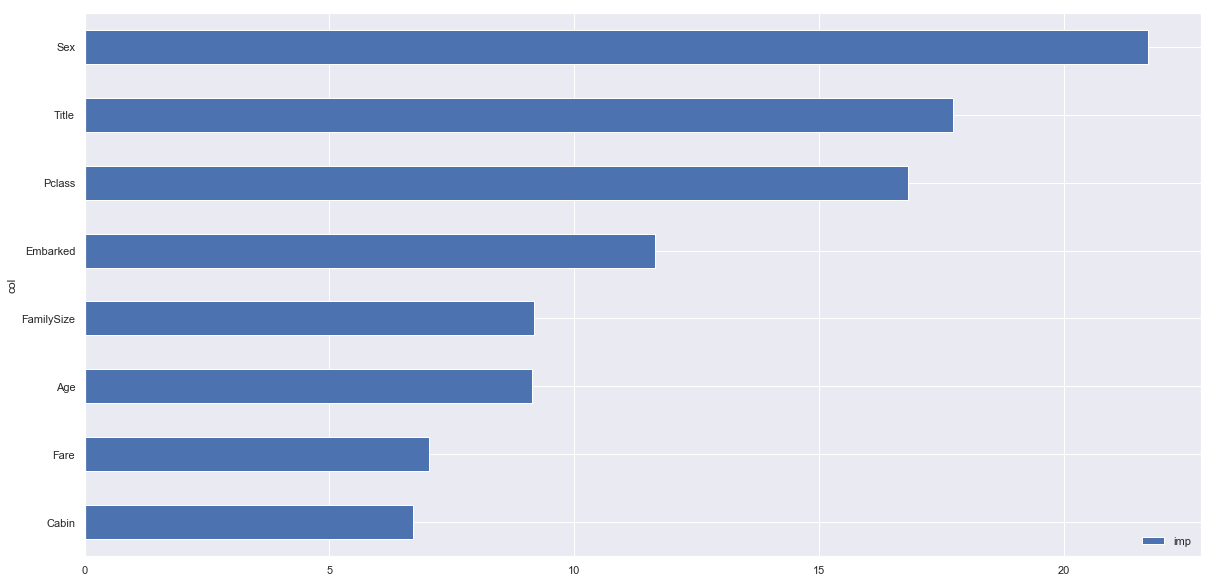

In [169]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [170]:
X_train.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.033333,0,0,0.4
1,1,1,3.0,2.0,0.800000,1,2,0.4
2,3,1,1.0,0.0,2.033333,0,1,0.0
3,1,1,2.0,2.0,0.800000,0,2,0.4
4,3,0,2.0,0.0,2.033333,0,0,0.0


In [171]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.100000,2,0,0.0
1,893,3,1,3.0,0.0,2.100000,0,2,0.4
2,894,2,0,3.0,0.0,1.771429,2,0,0.0
3,895,3,0,2.0,0.0,2.100000,0,0,0.0
4,896,3,1,1.0,0.0,2.100000,0,2,0.8


In [172]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [175]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.100000,2,0,0.0
1,893,3,1,3.0,0.0,2.100000,0,2,0.4
2,894,2,0,3.0,0.0,1.771429,2,0,0.0
3,895,3,0,2.0,0.0,2.100000,0,0,0.0
4,896,3,1,1.0,0.0,2.100000,0,2,0.8


In [177]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')

In [178]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [179]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0.])

In [180]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [181]:

# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

submission.head()

Converted Survived column to integers.


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [182]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [183]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('C:/Users/abcd/Desktop/TItanic/catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
